## Introduction

A key concept in quantum mechanics is the Hamiltonian. We say that the Hamiltonian corresponds to the total energy of a system. We call the eigenstates of the Hamiltonian "energy eigenstates" or "stationary states", and we say that they are states with a definite total energy. With these stationary states we can build yet other states; states that are linear combinations of stationary states. It is then our job to find out *which* linear combination describes whatever particular state we happen to be looking at. Once we have that, we are done. We now know with certainty what the probability of measuring a particular energy is. These probabilities are static in time.

So let us say that we are looking at the ground state of the quantum harmonic oscillator potential. We want to measure the energy of this state. What will we get? Well, we know for certain that we will get the ground state energy. No matter how many times we measure, this will always be true. But perhaps we are unhappy about this; perhaps we want our state to change. How can we do this? The answer lies with the Hamiltonian. Since the Hamiltonian does not change in time, neither does our state. Sure, the wave function for our state might be time-dependent, but the linear combination we have used to describe our state is unchanged. And so, the probability of measuring a particular energy of our state is also unchanged. We need the Hamiltonian to change in time, if we want our state to change in time. 

This is what time-dependent pertubation theory is all about. It is the theory of what happens when we give the Hamiltonian a time dependency. Now, suddenly, meausurement probabilities become time-dependent and what was the ground state of the quantum harmonic oscillator just a minute ago, might now have turned into the first excited state. In this way, time-dependent perturbation theory opens the door to the possibility of controlling quantum states. Like what happens in a quantum computer.

In this notebook we will be looking at how time-dependent perturbation theory can be used in the context of quantum computing. We will be focusing especially on how time-dependent sinusoidal perturbations (what we call "pulses") can affect the state of a two-level quantum system (the "qubit"). We will also be doing experiments on real quantum computers by using the Pulse module in Qiskit, which allows pulse-level control of real qubits.

This notebook is meant to be read in conjuction with a quantum mechanics course following the textbook: "Introduction to quantum mechanics" (third edition) by David Griffiths and Darrel Schroeter. As such, references to this textbook will made made throughout these notes.

## Qubits in Qiskit

<div class="alert alert-block alert-success"> <strong>Learning goal:</strong> Being able to identify what kind of potential makes for a good qubit and why. </div>
<div class="alert alert-block alert-warning"> <strong>Exercise:</strong> The theory behind the qubit.  </div>

Let us begin by looking at a simple model of a qubit. Suppose we have a particle trapped in the quantum harmonic oscillator (QHO) potential. This will be our qubit. We call the ground state of the QHO $|\psi_0\rangle$ and the first excited state $|\psi_1\rangle$. For now, we ignore all the higher states. The Hamiltonian for the system looks like this:

\begin{equation}
H^0 = \frac{p^2}{2m} + \frac{1}{2}m\omega x^2
\end{equation}

Remember, $p$ and $x$ are operators here. Let us say that our qubit starts out in the state $|\psi_0\rangle$, but that we want to "flip" the qubit, so that it is in the state $|\psi_1\rangle$ instead. We know that we can control the qubit by sending pulses to it. At what frequency should we send a pulse, if we would like the qubit to transition from the state $|\psi_0\rangle$ to the state $|\psi_1\rangle$?

<details>
<summary>Hint 1</summary>
Remember, a pulse is a time-dependent sinusoidal perturbation. Griffiths deals with these in section 11.1.3. What is the transition probability for a time-dependent sinusoidal perturbation, according to first-order perturbation theory? At what frequency is the transition probability highest?
</details>


<details>
<summary>Hint 2</summary>
The transition probability is highest when the frequency of the perturbation, is the same as the frequency of the qubit $\omega_0$. We sometimes also call $\omega_0$ the "resonance frequency" of the qubit. The resonance frequency is related to the energy difference between the two qubit states. What is the energy of the ground state and the first excited state of the QHO? 
</details>

<br>

<details>
<summary>Answer</summary>
The transition probability is maximized when the frequency of the pulse is equal to the resonance frequency of the qubit (see Griffiths, equation 11.35). The resonance frequency of the qubit depends on the energy difference between the two states of the qubit. If $E_0$ is the energy of $|\psi_0\rangle$ and $E_1$ is the energy of $|\psi_1\rangle$, then the resonance frequency $\omega_0$ is (Griffiths, equation 11.18):
    
<br>
<br>
    
\begin{align*}
\omega_0 = \frac{E_1 - E_0}{\hbar}
\end{align*}
    
Since the qubit sits in a QHO potential, we need the energies of this potential. They are (Griffiths, equation 2.84):
    
\begin{align*}
E_n &= \left( n + \frac{1}{2} \right) \hbar\omega
\end{align*}

With this we find the resonance frequency for the qubit:
    
\begin{align*}
\omega_0 &= \frac{1}{\hbar}\left( \frac{3}{2}\hbar\omega - \frac{1}{2}\hbar\omega \right) = \omega
\end{align*}
    
So we should send a pulse with a frequency equal to the QHO frequency.
</details>

<br>

After a while, we might realize that the qubit we have built does not always work as we had intended it to. The QHO potential might not have been the best potential for us to use. See if you can think of a reason why this might be.

<details>
<summary>Hint 1</summary>
There is something special about the energy levels of the QHO, which might make it difficult for us to control the qubit with pulses.
</details>

<br>

<details>
<summary>Answer</summary>
The energy levels of the QHO are evenly spaced, so when we send pulses to it, we might excite other states that we did not mean to excite. We might accidentally end up in the state $|\psi_2\rangle$ or $|\psi_3\rangle$ etc., instead of just going between the states $|\psi_0\rangle$ and $|\psi_1\rangle$ .
</details>

<br>

Perhaps adding a small perturbation $H'$ to the QHO potential will fix this issue. Maybe we can add something like $\lambda x^4$, for some constant $\lambda$. That way, the Hamiltonian for the system would look like this:

\begin{align}
H = H^0 + H' = \frac{p^2}{2m} + \frac{1}{2}m\omega x^2 + \lambda x^4
\end{align}

Use perturbation theory to show that this idea works, by finding the first-order corrections to the energy levels of the perturbed harmonic oscillator. You do not need to integrate to do this.

<details>
<summary>Hint 1</summary>
When we work with the QHO, it is usually a good idea to express our operators in terms of ladder operators.
</details>

<details>
<summary>Hint 2</summary>
What is the equation for the first-order corrections to the energies, due to some perturbation $H'$? How can $H'$ be expressed in terms of ladder operators?
</details>

<details>
<summary>Hint 3</summary>
Remember, ladder operators do not commute, so $a_+a_- \neq a_-a_+$. You might also see a lot of cancellation if you remember that $\langle m | n \rangle = 0$ unless $m=n$, in which case $\langle \psi_m |  \psi_n \rangle = 1$.
</details>

<br>

<details>
<summary>Answer</summary>
The first-order corrections to the energies are (Griffiths, equation 7.9):

\begin{align*}
E_n^1 = \langle \psi_n | H' | \psi_n \rangle = \langle \psi_n | \lambda x^4 | \psi_n \rangle
\end{align*}
    
Where $|\psi_n\rangle$ is the $n$'th eigenstate of the QHO. We know that (Griffiths, equation 2.70):

\begin{align*}
    x = \sqrt{\frac{\hbar}{2m\omega}}(a_+ + a_-)
\end{align*}
    
Where $a_+$ and $a_-$ are the ladder operators for the QHO. Hence:
    
\begin{equation}
    E_n^1 = \frac{\lambda\hbar^2}{4m^2\omega^2}  \langle n | (a_+ + a_-)^4 | n \rangle
\end{equation}

Expanding $(a_+ + a_-)^4$ yields a lot of terms, especially considering the fact that the ladder operators do not commute. However, a lot of these terms vanish, since they lead to terms with $\langle \psi_m | \psi_n \rangle$ where $m \neq n$. We end up with:
    
\begin{equation}
    E_n^1 = \frac{\lambda\hbar^2}{4m^2\omega^2}  \langle \psi_n | ( a_+^2a_-^2 + a_+a_-a_+a_- + a_+a_-^2a_+ + a_-a_+^2a_- + a_-a_+a_-a_+ + a_-^2a_+^2 ) | \psi_n \rangle
\end{equation}    
    
Using the relations (Griffiths, equation 2.67):
    
\begin{align*}
    a_+|\psi_n\rangle &= \sqrt{n+1}|\psi_{n+1}\rangle
   \\ a_-|\psi_n\rangle &= \sqrt{n}|\psi_{n-1}\rangle
\end{align*}
    
We obtain:

\begin{equation}
    E_n^1 = \frac{3\lambda\hbar^2}{4m^2\omega^2} (2n^2 + 2n + 1)
\end{equation}  

Since $E_n^1$ depends explicitly on $n$, the corrections to the energy levels of the QHO must all be different, hence the difference between energy levels unequal. This is an example of an anharmonic quantum oscillator.
</details>

<br>

Now that the differences between the energy levels of our potential are unequal, we are not as worried about accidentally exciting higher states with our pulses.

The qubits that IBM use are called "transmon qubits". The difference between the energy levels of a transmon qubit are also unequal, for exactly the same reasons that we have discussed. The picture below, which was taken from <font color='#3366CC'> [here](https://qiskit.org/textbook/ch-quantum-hardware/transmon-physics.html)</font>, illustrates that point.

<div>
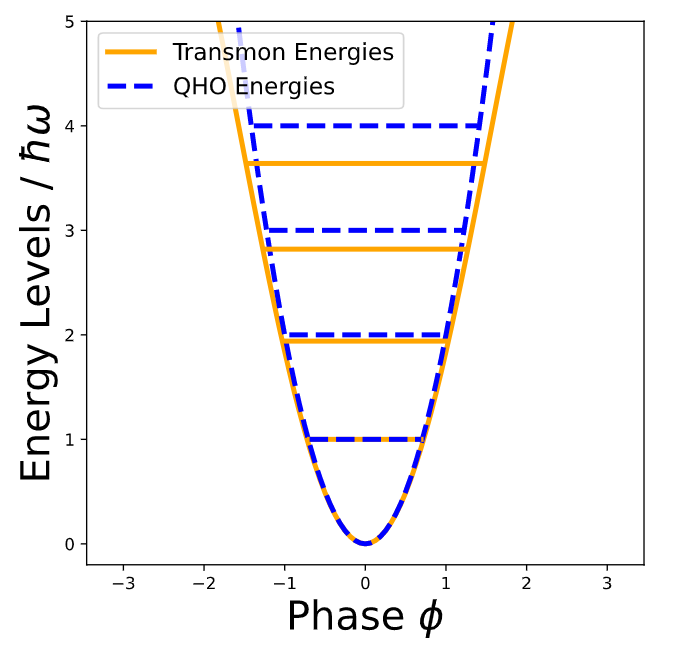
</div>

<br>

So when we are working with qubits in Qiskit, we can think of them as particles in an anharmonic quantum oscillator potential. We call the ground state of this potential $|0\rangle$ and we say that it has a measurement value of 0. The first excited state we call $|1\rangle$, and we say that it has a measurement value of 1. We ignore the higher states. In this way, the qubit can be in the ground state, the first excited state, or any superposition of these two states. But a measurement of a qubit in Qiskit is sure to return a value of either 0 or 1.

## Pulses in Qiskit

<div class="alert alert-block alert-success"> <strong>Learning goal:</strong> Being able to explain the basic anatomy of a pulse in Qiskit.</div>

Take a look at the picture below.

<div>
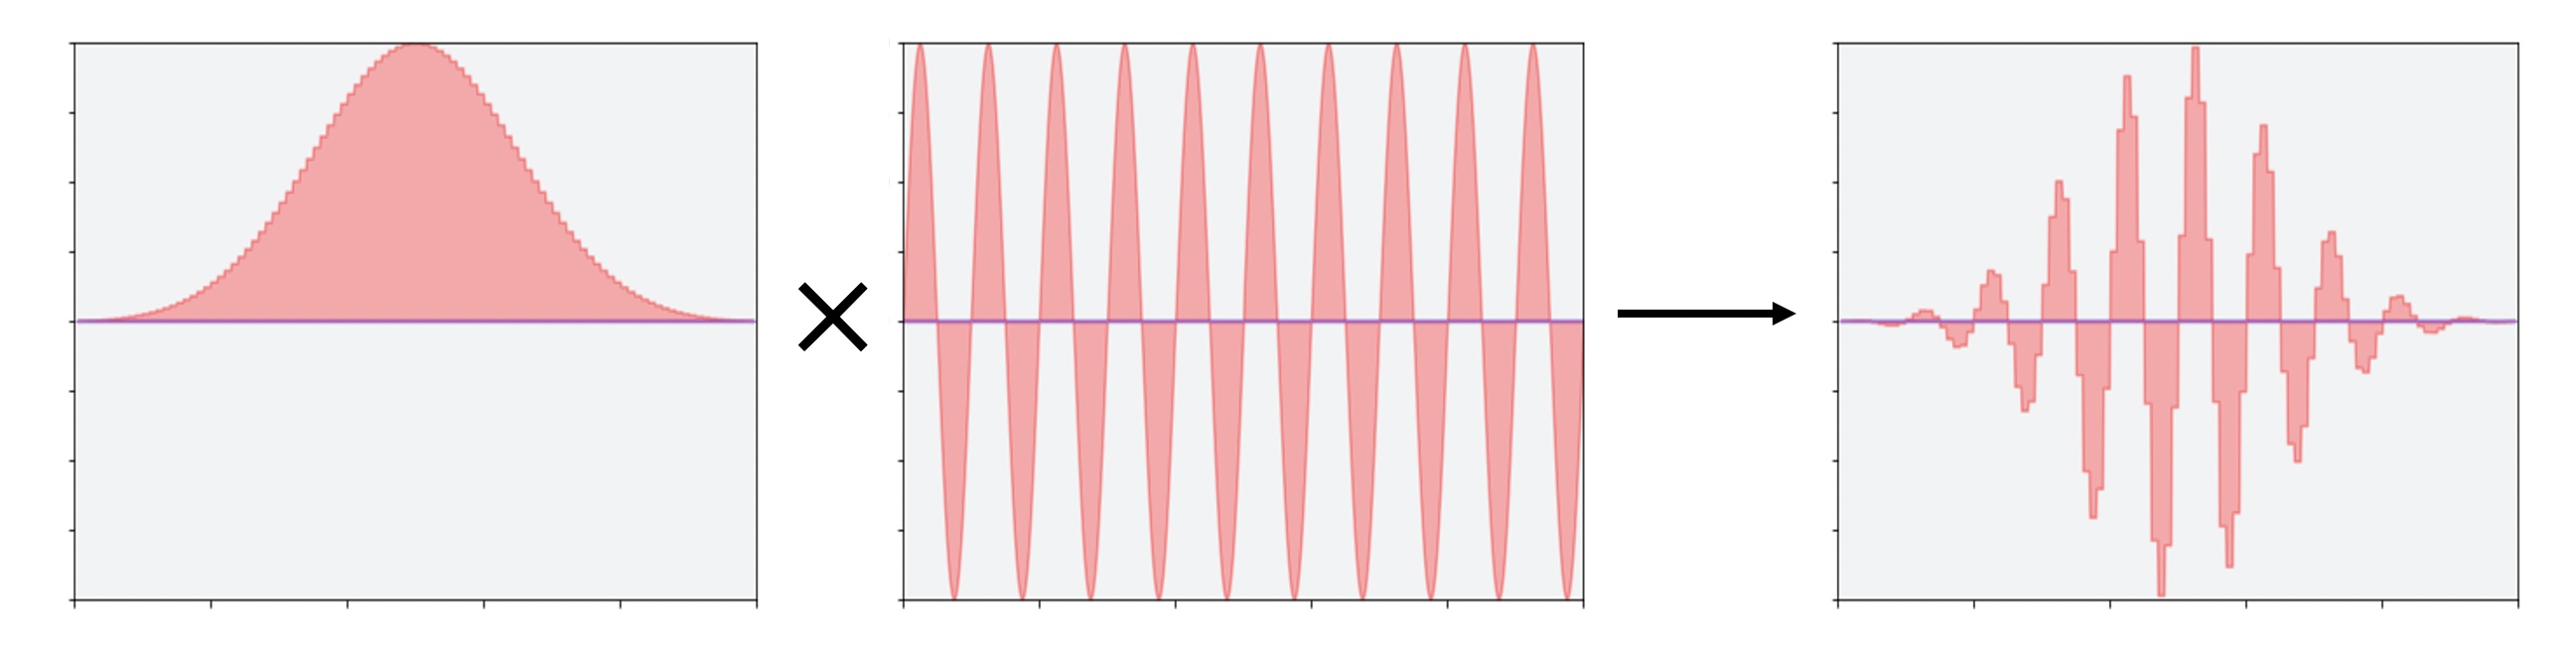
</div>

\
Here we see three waves. The first wave has a Gaussian shape, the second wave is sinusoidal, and the third wave is a mixture of the first two waves. The first wave is what we call the "pulse envelope". We call it an "envelope" because we use it to "send" the second wave, just like we use a regular envelope to send a letter. The second wave contains the actual frequency and phase of our pulse. We call these the "drive frequency" and the "drive phase" of our pulse. We will not be focusing on the drive phase of our pulse, so from now on we will not mention it and always assume that it is zero. In this way, a pulse can be thought of as a mixture of a drive frequency and an envelope. 

Below are some questions you might have regarding the drive frequency and pulse envelope. Feel free to read the answers to questions that concern you, or skip them entirely if you wish.

<div class="alert alert-info">
  <strong>Question 1:</strong> Is it possible to send a sine wave pulse to our qubit without a pulse envelope?
</div>

<details>
<summary>Answer</summary>
If you draw a sine wave as a function of time, you will see that it extends infinitely in each direction. At no point does the sine wave cut off. So it is impossible to send a pure sine wave pulse to a qubit, since we have to turn the pulse on and off at some point in time.
</details>

<br>

<div class="alert alert-info">
  <strong>Question 2:</strong> The pulse envelope used in the example image above is a Gaussian wave. Would it not always be better to use an even simpler pulse envelope, like a square wave for instance?
</div>

<details>
<summary>Answer</summary>
To answer this question, you need to be comfortable with the Fourier transform. If you are having a hard time remembering what the Fourier transform does, you will need to look it up before reading this explanation.
<br>
    <br>

What we call a "pulse envelope" is an example of something called a "window function". When using a window function (like our pulse envelope), we run into the problem of "spectral leakage". Spectral leakage refers to the fact that the frequency spectrum of our original function is changed after applying a window function to it. The frequency sprectrum after applying the window function now "leaks" into other frequencies.

Below is an image of three waves: A pure sine wave, and two other sine waves within square window functions. Below these three waves are their Fourier transforms.

<div>
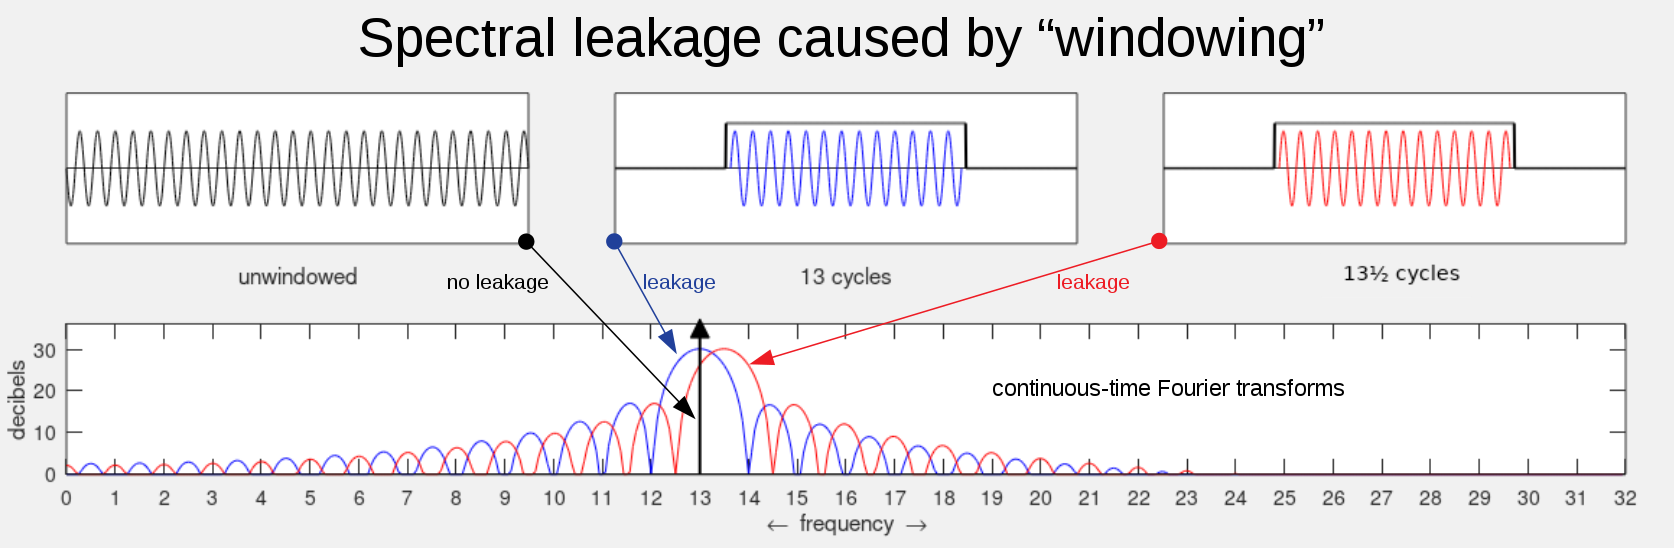
</div>

\
Note how the Fourier transform of the pure sine wave is a Dirac delta function, since a pure sine wave only contains one frequency. The Fourier transforms of the sine waves with the square window functions exhibit spectral leakage to other frequencies. The reason why we might use a Gaussian wave as our pulse envelope, as opposed to a square pulse envelope, is that the spectral leakage drops of more rapidly with a Gaussian pulse envelope. 

There are even further details as to why a Gaussian wave is a good pulse envelope, but it all depends on what we want to achieve. For instance, the so-called "DRAG pulse" is a special type of Gaussian envelope, specifically designed to reduce leakage into frequencies that might excite higher states of our qubit. You can read about the DRAG pulse <font color='#3366CC'> [here](https://arxiv.org/abs/0901.0534) </font> if you like.
</details>




## Sending pulses to qubits in Qiskit

<div class="alert alert-block alert-success"> <strong>Learning goal:</strong> Being able to send pulses to qubits using black box functions.</div>

Here is a quick overview of how it works when we want to send pulses to qubits in Qiskit. First we construct a pulse, giving it parameters like amplitude, frequency, etc. Then we construct a "pulse experiment", which is the experiment we want to do on the qubit. It consists of sending the pulse to the qubit and measuring the state of the qubit after the pulse has hit it. When we have constructed our pulse experiment, we send it to a quantum computer and retrieve the results. 

If we want to repeat the experiment any number of times, we simply send our experiment to a quantum computer and ask it to repeat the experiment how ever many times we would like. Or perhaps we have 5 different pulse experiments that we want to run on a quantum computer. In that case we send a list of the experiments to the quantum computer and the quantum computer will run all of them before sending the results back. We can send at most 100 different pulse experiments to a quantum computer at a time.

The code required to do all of this can be a bit tricky to understand. So to make things easier, we will be using a few "black box functions". These are pre-written functions that can be used to send pulse experiments to qubits in the manner described above. Here is an overview of how they work.


### Black box functions
The functions "Square_pulse_to_PE" and "Gaussian_pulse_to_PE" are functions that we give the parameters for a square/Gaussian pulse (amplitude, frequency etc.) and they will return a pulse experiment. We can then take this pulse experiment and give it to the function "Results_from_PE". This function then sends the pulse experiment to a real quantum computer and returns the results. The function "Results_from_PE" can also be given list of pulse experiments to run and it can run any of these experiments multiple times if we wish.

To get a square pulse experiment from "Square_pulse_to_PE" we need to specify the following parameters:

- Which quantum computer would we like to send a pulse experiment to?
- Which qubit in that quantum computer would we like to send a pulse experiment to?
- What should be the duration of our pulse?
- What should be the amplitude of our pulse?
- What should be the frequency of our pulse?

To get a Gaussian pulse experiment from "Gaussian_pulse_to_PE" we need to specify the following parameters:

- Which quantum computer would we like to send a pulse experiment to?
- Which qubit in that quantum computer would we like to send a pulse experiment to?
- What should be the duration of our pulse?
- What should be the standard deviation of our pulse?
- What should be the amplitude of our pulse?
- What should be the frequency of our pulse?

To send an experiment to a quantum computer using "Results_from_PE" we need to specify the following:

- Which quantum computer would we like to send the pulse experiment(s) to?
- Which pulse experiment(s) would we like to send?
- How many times do we want each pulse experiment to be run?
- Have we supplied a single pulse experiment or a list of pulse experiments to run?

Let us now go through some of the questions you might have at this point, regarding these black box functions and how to use them. Feel free to skip these questions if you like.

<div class="alert alert-info">
  <strong>Question 3:</strong> How do I choose a quantum computer send a pulse experiment to?
</div>

<details>
<summary>Answer</summary>
In the upper left corner of the "IBM Quantum Lab" user interface, you will see nine dots. Click on them and a tab will open. Click on "Compute ressources" and you will be taken to a page where you can see which quantum computers you have access to, as well as how many qubits each quantum computer has. For instance, the computer "ibmq_manila" has 5 qubits. If we want to send a pulse experiment to this quantum computer, we supply our function with the string "ibmq_manila".
</details>

<br>

<div class="alert alert-info">
  <strong>Question 4:</strong> How do I choose a qubit to send a pulse to?
</div>

<details>
<summary>Answer</summary>
Each quantum computer has a number of qubits (see question 3). They a numbered as integers, starting from 0. For example, the quantum computer "ibmq_manila" has 5 qubits. If we wanted to send a pulse experiment to the first of these qubits, we should supply the function with the integer 0.
</details>

<br>

<div class="alert alert-info">
  <strong>Question 5:</strong> How do I choose a duration for my pulse?
</div>

<details>
<summary>Answer</summary>
A pulse duration needs to be given as an integer number. The integer number must be a multiple of 16 and it must be at least 64. This integer number specifies the duration of the pulse in steps of 0.222ns. So for instance, giving the function the integer number 160 specifies that the pulse should have a duration of 35.52ns.
</details>

<br>

<div class="alert alert-info">
  <strong>Question 6:</strong> How do I choose an amplitude for my pulse?
</div>

<details>
<summary>Answer</summary>
In Qiskit, pulse amplitudes must be between 0 and 1, so simply supply the function with any number between 0 and 1.
</details>

<br>

<div class="alert alert-info">
  <strong>Question 7:</strong> How do I choose a frequency for my pulse?
</div>

<details>
<summary>Answer</summary>
Pulse frequencies must be given in Hz. The typical resonance frequency of IBMs qubits is around 5GHz, ranging from 4.8GHz to 5.4GHz and sensitive to changes down to 1MHz. You can see IBMs estimates for their qubit frequencies by clicking on a quantum computer under "Compute ressources" (see question 3).
</details>

<br>

<div class="alert alert-info">
  <strong>Question 8:</strong> How do I choose a standard deviation for my Gaussian pulse?
</div>

<details>
<summary>Answer</summary>
Standard deviations are specified using the same logic that applies to pulse durations (see question 5), except that standard deviations need not be multiples of 16 or even integers. It is recommended to choose a standard deviation that is some fraction of the pulse duration.
</details>

<br>

In the cell below are the black box functions. Remember, you need to run the cell to be able to use them.

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

### Square pulse function ###

### Takes the parameters for a square pulse, returns a pulse experiment.

def Square_pulse_to_PE(backend_QC, qubit, drive_dur, drive_amp, drive_freq):
    
    from qiskit import pulse
    from qiskit.circuit import Gate

    provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    backend = provider.get_backend(backend_QC)

    envelope = pulse.Constant(duration=drive_dur,
                              amp=drive_amp,
                              name='excitation_pulse')
    
    with pulse.build(backend=backend) as single_pulse:
        drive_chan = pulse.drive_channel(qubit) 
        pulse.set_frequency(drive_freq, drive_chan)
        pulse.play(envelope, drive_chan)
        
    PE = QuantumCircuit(1, 1)
    pulse_gate = Gate("pulse_gate", 1, [])
    PE.append(pulse_gate, [0]) 
    PE.add_calibration(pulse_gate, [0], single_pulse) 
    PE.measure(0,0)
    
    return PE

### Further details ###

#Supply a backend quantum computer as a string.
#Supply the qubit that you wish to work on. This is an integer number starting from 0.
#Supply a drive duration in integer steps of dt = 0.222 ns. 
#Drive duration must be at least 64 long and a multiple of 16.
#Supply an amplitude. Must be between 0 and 1.
#Supply a drive frequency in Hz.
#Returns a pulse experiment.

### Gaussian pulse function ###

### Takes the parameters for a Gaussian pulse, returns a Gaussian pulse experiment.

def Gaussian_pulse_to_PE(backend_QC, qubit, drive_dur, drive_sig, drive_amp, drive_freq):
    
    from qiskit import pulse
    from qiskit.circuit import Gate

    provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    backend = provider.get_backend(backend_QC)

    envelope = pulse.Gaussian(duration=drive_dur,
                              sigma=drive_sig,
                              amp=drive_amp,
                              name='excitation_pulse')
    
    with pulse.build(backend=backend) as single_pulse:
        drive_chan = pulse.drive_channel(qubit) 
        pulse.set_frequency(drive_freq, drive_chan)
        pulse.play(envelope, drive_chan)
        
    PE = QuantumCircuit(1, 1)
    pulse_gate = Gate("pulse_gate", 1, [])
    PE.append(pulse_gate, [0]) 
    PE.add_calibration(pulse_gate, [0], single_pulse) 
    PE.measure(0,0)
    
    return PE

### Further details ###

#Supply a backend quantum computer as a string.
#Supply the qubit that you wish to work on. This is an integer number starting from 0.
#Supply a drive duration in integer steps of dt = 0.222 ns. 
#Drive duration must be at least 64 long and a multiple of 16.
#Supply the standard deviation of the Gaussian envelope.
#Supply an amplitude. Must be between 0 and 1.
#Supply a drive frequency in Hz.
#Returns a pulse experiment.

### Running pulse experiments function ###

### Takes pulse experiments, runs them on the specified backend.

def Results_from_PE(backend_QC, PE, num_run, list_PE):
    
    provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    backend = provider.get_backend(backend_QC)

    job = backend.run(PE, 
                      meas_level=2,
                      memory=True,
                      shots=num_run)
    
    results = job.result()
    
    if list_PE == True:
        
        exp = []
        
        for i in range(len(PE)):
            exp.append(results.get_memory(i))
        
        return exp
    
    else:
        return results.get_memory()
    
### Further details ###

#Supply a backend quantum computer as a string. 
#Must match the backend used to create the pulse experiment.
#Supply a pulse experiment or a list of pulse experiments to run.
#Supply an integer specifying how many times you want to run each pulse experiment.
#Supply a boolean. True if list of pulse experiments, false if single pulse experiment.
#Returns a list (or list of lists) of strings. 
#Each string is either '0' og '1' depending on the qubit state after measurement.

#NB! You can run a list of at most 100 pulse experiments at a time.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Sending a pulse to a qubit

<div class="alert alert-block alert-success"> <strong>Learning goal:</strong> Being comfortable with sending pulse experiments to quantum computers and working with the results.
</div>

<div class="alert alert-block alert-warning"> <strong>Experiment:</strong> Average qubit value. </div>

Qubits in qiskit always start out in the state $|0\rangle$ which has a measurement value of 0. The other qubit state, $|1\rangle$, has a measurement value of 1. Use the black box functions to send at least 1000 pulses to a qubit in a quantum computer of your choosing. Find the average qubit value. Experiment with what happens to the average measured qubit value as you change the parameters of your pulse. See if you can get an average measured qubit value of more than 0.05. If you cannot, simply move on when you are comfortable with sending pulses to qubits.

In [ ]:
#Your code here




## Frequency sweeping with square pulses

<div class="alert alert-block alert-success"> <strong>Learning goals:</strong> 
    
- Being able to find the resonance frequency of a qubit by frequency sweeping.
    
- Gaining an intuition on the limitations of time-dependent first-order perturbation theory.
</div>

<div class="alert alert-block alert-warning"> <strong>Exercise:</strong> Sketching a frequency sweep experiment. </div>

Suppose you sent a number of square pulse experiments to a qubit, with frequencies close to the resonance frequency of the qubit. Sketch what you think the average measured qubit value would look like as a function of pulse frequency. Would you expect the highest average qubit value to be 1? Why/Why not?

<div class="alert alert-block alert-warning"> <strong>Experiment:</strong> Finding the resonance frequency of a qubit. </div>

Conduct a frequency sweep experiment to determine the approximate resonance frequency of a qubit. Send a number of square pulse experiments to a qubit, with frequencies in the interval 4.8GHz to 5.4GHz. Use a pulse amplitude of 0.02. Plot the average qubit value as a function of pulse frequency and use this plot to estimate the qubit resonance frequency. You should see a sharp peak in the average qubit value at this resonance frequency. If you do not see this peak, try running the sweep again for a wider interval, or conducting several sweep experiments until you find an estimate for the qubit resonance frequency. Remember! You can send a list of at most 100 pulse experiments to a quantum computer at a time, but each pulse experiment in that list can be run more than 1000 times.

In [1]:
#Your code here




<div class="alert alert-block alert-warning"> <strong>Experiment:</strong> Testing first-order perturbation theory. </div>

Send a number of pulse experiments to a qubit, with frequencies close to the qubit resonance frequency. Use a pulse amplitude of 0.02. Plot the average qubit value as a function of pulse frequency. Does the plot match your expectations? Try fitting first-order perturbation theory to your results.

In [2]:
#Your code here




<div class="alert alert-block alert-warning"> <strong>Experiment: </strong>Breaking first-order perturbation theory. </div>

Repeat the previous experiment, but this time with an increased pulse amplitude. Does first-order perturbation theory still fit? Repeat the experiment for higher and higher amplitudes. At what amplitude does first order perturbation theory break down? Describe how the plot changes, particularly the central peak, as you keep increasing the pulse amplitude. What happens to the transition probability of a qubit if it is hit with a pulse on resonance and the pulse amplitude is increased?

In [3]:
#Your code here




<div class="alert alert-block alert-warning"> <strong>Voluntary bonus exercise: </strong>Finding the transition probability without perturbation theory. </div>

Solve Griffiths problem 11.9 to obtain the transition probability of a square pulse without using perturbation theory. You should get the following:
<br>

\begin{align*}
    P_{a \rightarrow b}(t) = \left( \frac{|V_{ab}|}{2\hbar\omega_r} \right)^2 \sin^2(\omega_r t)
\end{align*}
Where $\omega_r$ is the "Rabi flopping frequency", defined as:
<br>

\begin{align*}
    \omega_r \equiv \frac{1}{2}\sqrt{(\omega - \omega_0)^2 + (|V_{ab}|/\hbar)^2}
\end{align*}
<br>
Check that this transition probability reduces to the first-order transition probability when the amplitude of the perturbation is small. Try fitting this result to some of the data you got from previous exercises. How does the fit compare to a fit using first-order results?

<details>
<summary>Hint 1</summary>
    
We are looking at the perturbation $H'$ such that:
\begin{align*}
    H'_{ba} = \frac{V_{ba}}{2}e^{-i\omega t} \\[2mm]
    H'_{ab} = \frac{V_{ab}}{2}e^{i\omega t}
\end{align*}
Hence we wish to solve the coupled differential equations:
  
\begin{align*}
    \dot{c}_a & = -\frac{i}{2\hbar}V_{ab}e^{i(\omega-\omega_0) t}c_b
    \\[2mm] \dot{c}_b & = -\frac{i}{2\hbar}V_{ba}e^{i(\omega_0 - \omega) t}c_a 
\end{align*}

A strategy we can use is the following. If we take the time derivative of the second equation, we will get an equation which contains $\dot{c}_a$. This means that we can substitute in the first equation. We end up with a second order homogeneous differential equation for $c_b$. We find the general solution to this equation through the characteristic equation in the usual way. Once we have the general solution we use the boundary conditions $c_b(0) = 0$ and $c_a(0)=1$ to get the particular solution.
    
    
</details>

<br>

<details>
<summary>Answer</summary>
As specified in problem 11.9, we make the rotating wave approximation at the beginning of our calculations such that:
  
<br>  
  
\begin{align*}
    H'_{ba} = V_{ba} \cos(\omega t) \approx \frac{V_{ba}}{2}e^{-i\omega t}
\end{align*}

And:  
\begin{align*}
    H'_{ab} = V_{ab} \cos(\omega t) \approx \frac{V_{ab}}{2}e^{i\omega t}
\end{align*}
  
  
Incidentally, assuming that $V_{ab}$ and $V_{ba}$ are real, we must have $V_{ab} = V_{ba}$ (this has to do with the fact that the perturbation matrix must be "Hermitian", but do not worry too much about what this means exactly). We use equation 11.17 in Griffiths and get the coupled differential equations:
  
\begin{align*}
    \dot{c}_a &= -\frac{i}{\hbar}H_{ab}'e^{-i\omega_0 t}c_b = -\frac{i}{2\hbar}V_{ab}e^{i\omega t}e^{-i\omega_0 t}c_b
    \\[2mm] \dot{c}_b &= -\frac{i}{\hbar}H_{ba}'e^{i\omega_0 t}c_a = -\frac{i}{2\hbar}V_{ba}e^{-i\omega t}e^{i\omega_0 t}c_a 
\end{align*}
Let us begin by differentiating $\dot{c}_b$ and inserting $\dot{c}_a$:
  
\begin{align*}
    \ddot{c}_b &= -i\frac{V_{ba}}{2\hbar}\left[i(\omega_0 - \omega)e^{i(\omega_0 - \omega)t}c_a + e^{i(\omega_0 - \omega)t}\dot{c}_a
    \right] 
    \\[2mm] &= i(\omega_0 - \omega)\left[ -i\frac{V_{ba}}{2\hbar}e^{i(\omega_0 - \omega)t}c_a\right] - i\frac{V_{ba}}{2\hbar}e^{i(\omega_0 - \omega)t}\left[ -i\frac{V_{ab}}{2\hbar}e^{-i(\omega_0 - \omega)t}c_b\right]
    \\[2mm] &= i(\omega_0 - \omega)\dot{c}_b - \frac{|V_{ab}|^2}{4\hbar^2}c_b
\end{align*}
  
Hence, we have the second order differential equation:
  
\begin{align*}
    \ddot{c}_b + i(\omega - \omega_0)\dot{c}_b + \frac{|V_{ab}|^2}{4\hbar^2}c_b = 0
\end{align*}
  
The characteristic equation is:
  
\begin{align*}
    \lambda^2 + i(\omega - \omega_0)\lambda + \frac{|V_{ab}|^2}{4\hbar^2} = 0
\end{align*}
  
Which can be easily solved to yield:
  
\begin{align*}
    \lambda &= \frac{1}{2}\left[-i(\omega - \omega_0) \pm \sqrt{-(\omega - \omega_0)^2 - \frac{|V_{ab}|^2}{\hbar^2}} \right]
    \\[2mm]&= i\left[-\frac{(\omega - \omega_0)}{2} \pm \omega_r \right]
\end{align*}
  
The general solution is therefore:
  
\begin{align*}
    c_b(t) &= A \cdot \exp\left( i\left[ -\frac{(\omega - \omega_0)}{2} + \omega_r \right]t \right) + B \cdot \exp\left( i\left[ -\frac{(\omega - \omega_0)}{2} - \omega_r \right]t \right)
    \\[2mm]&= e^{-\frac{i(\omega - \omega_0)t}{2}}\left[ A e^{i\omega_r t} + B e^{-i\omega_rt} \right]
    \\[2mm]&= e^{-\frac{i(\omega - \omega_0)t}{2}} \left[ C\cos(\omega_r t) + D\sin(\omega_r t) \right]
\end{align*}
  
The boundary condition $c_b(0) = 0$ yields $C = 0$, hence:
  
\begin{align*}
    c_b(t) = D e^{-\frac{i(\omega - \omega_0)t}{2}} \sin(\omega_r t) 
\end{align*}
  
To find $D$ we must use the boundary condition $c_a(0) = 1$. We know that:
  
\begin{align*}
    c_a = i\frac{2\hbar}{V_{ba}}e^{i(\omega - \omega_0)t}\dot{c}_b
\end{align*}
  
So we need an expression for $\dot{c}_b$. We can get this by taking the derivative of our expression for $c_b$:
  
\begin{align*}
    \dot{c}_b = e^{i(\omega_0 - \omega)t/2}D\left[ i\left( \frac{\omega_0 - \omega}{2} \right)\sin(\omega_r t) + \omega_r\cos(\omega_r t) \right]
\end{align*}
Hence:
\begin{align*}
    c_a(t) = i\frac{2\hbar}{V_{ba}}e^{i(\omega_0 - \omega)t/2}D\left[ i\left( \frac{\omega_0 - \omega}{2} \right)\sin(\omega_r t) + \omega_r\cos(\omega_r t) \right]
\end{align*}
  
The boundary condition $c_a(0) = 1$ then gives us:
  
\begin{align*}
    D = -\frac{iV_{ba}}{2\hbar\omega_r}
\end{align*}
Therefore:
\begin{align*}
    c_b(t) = -\frac{iV_{ba}}{2\hbar\omega_r}e^{-\frac{i(\omega - \omega_0)t}{2}} \sin(\omega_r t)
\end{align*}
And hence:
\begin{align*}
    P_{a\rightarrow b}(t) = |c_b(t)|^2 = \left( \frac{|V_{ab}|}{2\hbar\omega_r} \right)^2 \sin^2(\omega_r t)
\end{align*}
  
If the amplitude of the perturbation is small, i.e. $|V_{ab}|^2 \ll \hbar^2(\omega - \omega_0)^2$, then $\omega_r \approx \frac{1}{2}|\omega - \omega_0|$ leading to:
  
\begin{align*}
    P_{a\rightarrow b}(t) \approx \frac{|V_{ab}|^2}{\hbar^2}\frac{\sin^2[(\omega_0 - \omega)t/2]}{(\omega_0 - \omega)^2}
\end{align*}
  
Which is exactly the result of first-order perturbation theory.
</details>



In [4]:
#Your code here




## Rabi experiments with square pulses

<div class="alert alert-block alert-success"> <strong>Learning goals:</strong> 
    
- Being able to conduct a Rabi experiment.
- Being able to construct pulses that can control the state of a qubit.
</div>

<div class="alert alert-block alert-warning"> <strong>Exercise:</strong> Sketching a time-dependent Rabi experiment. </div>

Suppose you conduct an experiment where you send square pulses with varying durations, at a frequency close to the resonance frequency of a qubit. If you were to plot the average measured qubit value as a function of pulse duration, what would you expect to see according to first-order perturbation theory? Sketch it.

Now suppose you conduct the same experiment, but this time at a frequency equal to the resonance frequency of the qubit. What do you now expect the plot to look like, according first-order perturbation theory? Sketch it.

<div class="alert alert-block alert-warning"> <strong>Experiment:</strong> Conducting a Rabi experiment. </div>

Conduct the experiments you have just considered. Fit an appropriate function to the data you obtain.

In [5]:
#Your code here




<div class="alert alert-block alert-warning"> <strong>Experiment:</strong> Controlling a qubit. </div>
Use your considerations and the results from your experiments to construct a pulse that can flip a qubit from the state $|0\rangle$ to the state $|1\rangle$. Can you also construct a pulse that turns the qubit into a 50/50 mix of the two states? Constructing pulses that can do these things perfectly is difficult due to the inherent noise of the systems. Do you best and do not be discouraged if you cannot do it as accurately as you would like.

In [6]:
#Your code here




## Gaussian pulses

<div class="alert alert-block alert-success"> <strong>Learning goal:</strong> Being able to do a first-order calculation of the transition probability for a qubit being hit by a Gaussian pulse.
</div>

<div class="alert alert-block alert-warning"> <strong>Exercise:</strong> The theory behind Gaussian pulses.  </div>

Consider the state $|\psi\rangle$ of a qubit, which we can write as:

\begin{align*}
    |\psi\rangle = c_a|\psi_a\rangle + c_b|\psi_b\rangle
\end{align*}

Where the states $|\psi_a\rangle$ and $|\psi_b\rangle$ have energies $E_a$ and $E_b$ respectively. At $t=0$ we imagine that the qubit is in the state $|\psi_a\rangle$. 

Suppose now that we wish to send a Gaussian pulse to this qubit, so that the perturbation to the Hamiltonian looks like the following:

\begin{align*}
    H'(t) = A \cdot \exp\left(-\frac{1}{2}\frac{(t-\tau/2)^2}{\sigma^2}\right) \cdot \cos(\omega t)
\end{align*}

Here $A$ is the amplitude of the pulse, $\sigma$ is the standard deviation, $\omega$ is the drive frequency, and the parameter $\tau$ defines the length of the pulse (we imagine turning the pulse on at $t=0$ and off at $t=\tau$). We are interested in calculating the transition probability for a qubit, after it has been hit by this Gaussian pulse. This transition probability is related to the coefficient $c_b$.

Write down an equation for the first-order approximation of $c_b$ after the pulse has hit the qubit.

<details>
<summary>Hint 1</summary>
Griffiths denotes the first-order approximation of $c_b$ as $c_b^{(1)}$. The equation for this first-order approximation contains an integral from $0$ to $t$. In this case, we are interested in finding $c_b^{(1)}$ after the pulse has hit the qubit, so at $t=\tau$.
</details>

<br>

<details>
<summary>Answer</summary>
We insert the perturbation into Griffiths equation 11.21 for $t=\tau$:
    
<br>
    <br>
       
\begin{align*}
    c_b &\approx -\frac{i}{\hbar}\int_{0}^\tau H'(t')\cdot e^{i\omega_0 t'} dt'
    \\[2mm]&= -\frac{i}{\hbar}\int_{0}^\tau A \cdot \exp\left(-\frac{1}{2}\frac{(t'-\tau/2)^2}{\sigma^2}\right) \cdot \cos(\omega t')\cdot e^{i\omega_0 t'} dt'
\end{align*}

Where $\omega_0 = \frac{E_b - E_a}{\hbar}$.
</details>

<br>

We now have an integral that gives us $c_b$ to the first order. To solve this integral, we need to make an approximation. Our approximation will be to set the limits of integration to $\pm \infty$. Sketch the perturbation as a function of time and use the sketch to give a rough estimate of what the ratio between $\sigma$ and $\tau$ should be, in order for our approximation to make sense.

<details>
<summary>Hint 1</summary>
Let us start by sketching the perturbation for arbitrary parameters. Let us choose $A=1$, $\tau=10$, $\sigma=4$, and $\omega=50$.

<br>
<br>

<div>
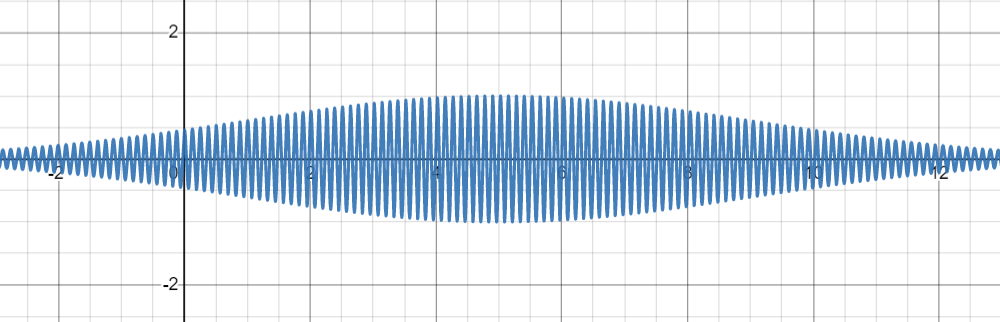
</div>

<br>

Here, the ratio between $\sigma$ and $\tau$ is $\frac{4}{10}$. For these parameters, it would not be a good approimation to say that integrating from $0$ to $\tau$ is the same as integrating from $-\infty$ to $+\infty$. This is because the "tails" of the pulse are not negligible for $t<0$ and $t>\tau$.
</details>

<br>

<details>
<summary>Answer</summary>
A ratio between $\sigma$ and $\tau$ of roughly $\frac{1}{5}$ seems to give us a pulse where integrating from $0$ to $\tau$ would likely not be so different than integrating from $-\infty$ to $+\infty$. A sketch of a pulse with this ratio between $\sigma$ and $\tau$ can be seen below.

<br>
<br>

<div>
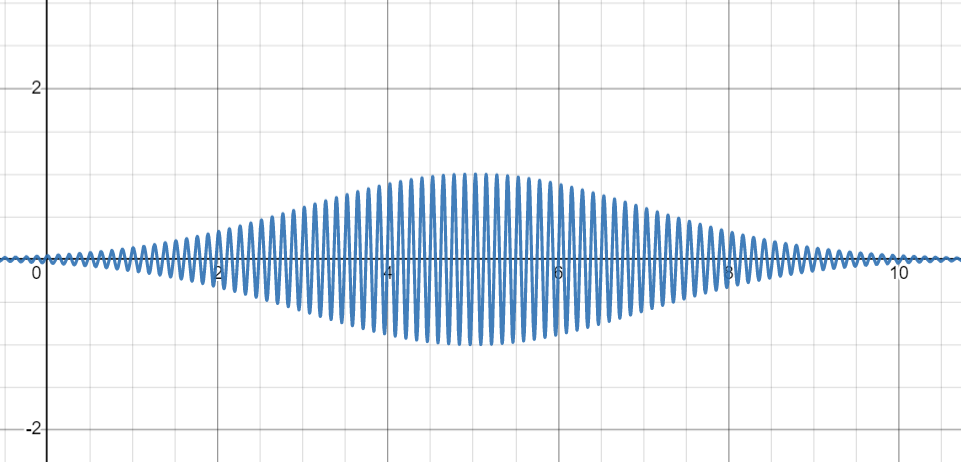
</div>

</details>

<br>

Using this approximation, calculate $c_b$ to the first order.

<details>
<summary>Hint 1</summary>
There should be a cosine in the integral you want to calculate. It might first be a good idea to re-write that cosine as a sum of exponentials. Then, a good strategy would be to re-write the integral so that it looks like an exponential integral you could look up the solution to.
</details>

<details>
<summary>Hint 2</summary>

You can find a list of integrals of exponential functions with known solutions  <font color='#3366CC'>[here.](en.wikipedia.org/wiki/List_of_integrals_of_exponential_functions) </font> 

</details>

<details>
<summary>Hint 3</summary>
You eventually want to use the integral:

\begin{align*}
    \int_{-\infty}^\infty e^{ -ax^2 - bx } dx = \sqrt{\frac{\pi}{a}} \exp\left( \frac{b^2}{4a}\right)
\end{align*}

Which applies for $a>0$.
</details>

<br>

<details>
<summary>Answer</summary>

We have:
\begin{align*}
    c_b &\approx -\frac{i}{\hbar}\int_{-\infty}^\infty A \cdot \exp\left(-\frac{1}{2}\frac{(t'-\tau/2)^2}{\sigma^2}\right) \cdot \cos(\omega t)\cdot e^{i\omega_0 t'} dt'
\end{align*}

Let us start by writing the cosine as an exponential and pulling any constants out of the integral:

\begin{align*}
    c_b &\approx -\frac{iA}{2\hbar}\int_{-\infty}^\infty  \exp\left(-\frac{1}{2}\frac{(t'-\tau/2)^2}{\sigma^2}\right) \cdot \left( e^{i\omega t'} - e^{-i\omega t'}\right)\cdot e^{i\omega_0 t'} dt'
    \\[2mm]&= -\frac{iA}{2\hbar}\left[\int_{-\infty}^\infty  \exp\left(-\frac{1}{2}\frac{(t'-\tau/2)^2}{\sigma^2}\right) \cdot e^{it'(\omega_0 + \omega)} dt' -\int_{-\infty}^\infty  \exp\left(-\frac{1}{2}\frac{(t'-\tau/2)^2}{\sigma^2}\right) \cdot e^{it'(\omega_0 - \omega)} dt'\right]
\end{align*}

Let us now take a look at the first integral:

\begin{align*}
    \int_{-\infty}^\infty  \exp\left(-\frac{1}{2}\frac{(t'-\tau/2)^2}{\sigma^2}\right) \cdot e^{it'(\omega_0 + \omega)} dt' &= \int_{-\infty}^\infty  \exp\left(-\frac{1}{2\sigma^2}(t'^2 + \tau^2/4 - 2\tau t')\right) \cdot e^{it'(\omega_0 + \omega)} dt'
    \\[2mm]&= \exp\left( -\frac{\tau^2}{8\sigma^2} \right)\int_{-\infty}^\infty  \exp\left( -\frac{1}{2\sigma^2} (t'^2 - 2\tau t') \right) \cdot e^{it'(\omega_0 + \omega)} dt'
    \\[2mm]&= \exp\left( -\frac{\tau^2}{8\sigma^2} \right)\int_{-\infty}^\infty  \exp\left( -\frac{1}{2\sigma^2} (t'^2 - 2\tau t') + it'(\omega_0 + \omega) \right) dt'
    \\[2mm]&= \exp\left( -\frac{\tau^2}{8\sigma^2} \right)\int_{-\infty}^\infty  \exp\left( -\frac{1}{2\sigma^2} t'^2 + \left(\frac{1}{\sigma^2}\tau + i(\omega_0 + \omega)\right)t' \right) dt'
\end{align*}

We know how to solve exponential integrals of this form:

\begin{align*}
    \int_{-\infty}^\infty e^{ -ax^2 - bx }dx = \sqrt{\frac{\pi}{a}}\exp\left(   \frac{b^2}{4a}\right)
\end{align*}

For $a>0$. In this case we have $a=\frac{1}{2\sigma^2}$ and $b = -\frac{1}{\sigma^2}\tau  - i(\omega_0 + \omega)$. Note that:

\begin{align*}
    \frac{b^2}{4a} &= \left(\frac{1}{\sigma^4}\tau^2 - (\omega_0 + \omega)^2 + i\frac{2\tau}{\sigma^2}(\omega_0 + \omega)\right)\cdot \frac{\sigma^2}{2}
    \\[2mm]&= \frac{1}{2\sigma^2}\tau^2 - \frac{\sigma^2}{2}(\omega_0 + \omega)^2 + i\tau(\omega_0 + \omega)
\end{align*}

Hence:

\begin{align*}
    \exp\left( -\frac{\tau^2}{8\sigma^2} \right)\int_{-\infty}^\infty  \exp\left( -\frac{1}{2\sigma^2} t'^2 + \left(\frac{1}{\sigma^2}\tau + i(\omega_0 + \omega)\right)t' \right) dt' 
    \\[2mm]= \sqrt{2\pi \sigma^2}\exp\left( \frac{3\tau^2}{8\sigma^2} - \frac{\sigma^2}{2}(\omega_0 + \omega)^2 + i\tau(\omega_0 + \omega) \right)
\end{align*}

The second integral is almost identical to the first, except that we now have $\omega_0 - \omega$ instead of $\omega_0 + \omega$, so we get:

\begin{align*}
    \int_{-\infty}^\infty  \exp\left(-\frac{1}{2}\frac{(t'-\tau/2)^2}{\sigma^2}\right)& \cdot\exp(it'(\omega_0 - \omega)) dt' 
    \\&= \sqrt{2\pi \sigma^2}\exp\left( \frac{3\tau^2}{8\sigma^2} - \frac{\sigma^2}{2}(\omega_0 - \omega)^2 + i\tau(\omega_0 - \omega) \right)
\end{align*}

Hence:

\begin{align*}
    c_b &\approx -\frac{iA}{2\hbar}\sqrt{2\pi\sigma^2}\exp\left( \frac{3\tau^2}{8\sigma^2} \right)\left[ e^{- \frac{\sigma^2}{2}(\omega_0 + \omega)^2 + i\tau(\omega_0 + \omega)} + e^{- \frac{\sigma^2}{2}(\omega_0 - \omega)^2 + i\tau(\omega_0 - \omega) } \right]
\end{align*}
</details>

<br>

Find the first-order transition probability of the qubit by taking the absolute square of the first-order approimation for $c_b$.

<details>
<summary>Hint 1</summary>
For a complex number $z$ we know that $|z|^2 = z^*z$.
</details>

<br>

<details>
<summary>Answer</summary>
We know that:

\begin{align*}
    |e^{a+ib} + e^{c+id}|^2 &= (e^{a+ib} + e^{c+id})(e^{a-ib} + e^{c-id})
    \\[2mm]&= e^{a+ib+a-ib} + e^{a+ib+c-id} + e^{c+id+a-ib} + e^{c+id+c-id}
    \\[2mm]&= e^{2a} + e^{a+c}e^{i(b-d)} + e^{a+c}e^{i(d-b)} + e^{2c}
    \\[2mm]&= e^{2a} + e^{2c} + e^{a+c}[\cos(b-d) + i\sin(b-d) + \cos(d-b) + i\sin(d-b)]
    \\[2mm]&= e^{2a} + e^{2c} + 2e^{a+c}\cos(b-d)
\end{align*}

In this case we have:

\begin{align*}
    a+c &= -\frac{\sigma^2}{2}(\omega_0 + \omega)^2 -\frac{\sigma^2}{2}(\omega_0 - \omega)^2
    \\[2mm]&= -\frac{\sigma^2}{2}\left[ (\omega_0 + \omega)^2 + (\omega_0 - \omega)^2 \right]
    \\[2mm]&= -\sigma^2(\omega_0^2 + \omega^2)
\end{align*}

And:

\begin{align*}
    b-d &= \tau(\omega_0 + \omega) - \tau(\omega_0 - \omega)
    \\[2mm]&= 2\tau\omega
\end{align*}

So:

\begin{align*}
    &\left|e^{-\frac{\sigma^2}{2}(\omega_0 + \omega)^2 + i\tau(\omega_0 + \omega) } + e^{-\frac{\sigma^2}{2}(\omega_0 - \omega)^2 + i\tau(\omega_0 - \omega) } \right|^2 
    \\[2mm]&= e^{-\sigma^2(\omega_0 + \omega)^2} + e^{-\sigma^2(\omega_0 - \omega)^2} + 2e^{-\sigma^2(\omega_0^2 + \omega^2)}\cos(2\tau\omega)
\end{align*}

Hence:

\begin{align*}
    P_{a \rightarrow b} = |c_b|^2 \approx \frac{A^2}{2\hbar^2}\pi\sigma^2\exp\left( \frac{3\tau^2}{4\sigma^2} \right) \left[ e^{-\sigma^2(\omega_0 + \omega)^2} + e^{-\sigma^2(\omega_0 - \omega)^2} + 2e^{-\sigma^2(\omega_0^2 + \omega^2)}\cos(2\tau\omega) \right]
\end{align*}
</details>

<br>

Now that we have an expression for the transition probability, let us think about the physics of the problem to see if we can make the expression even more simple. To start with, we of course assume that $\omega, \omega_0 > 0$ i.e. the frequency of the pulses that we send and the resonance frequency of the qubit are both positive numbers. We also assume that the pulse is relatively well-behaved. Let us think about the details of what we mean by this. When we send a pulse to a qubit, we imagine something like the following image.

<div>
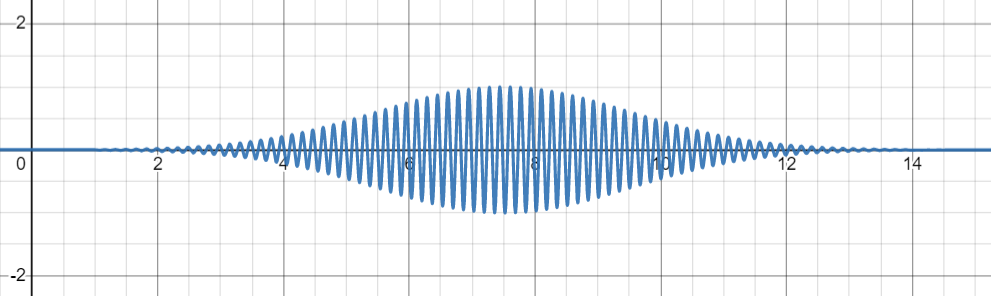
</div>

<br>

This is a pulse where there are many oscillations inside the pulse envelope. We do not imagine something like the following image.

<div>
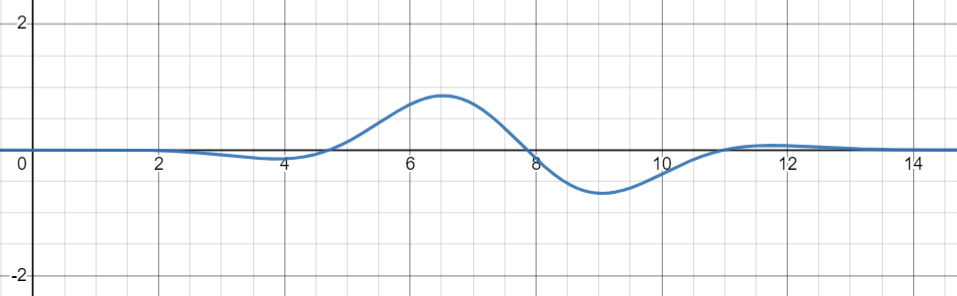
</div>

<br>

This pulse has very few oscillations inside the envelope. The pulses that we send in Qiskit look much more like the first image than the second image. They are pulses that have many oscillations inside the pulse envelope. So when we say a pulse is "well-behaved", we really mean that it has many oscillations inside the pulse envelope. Let us think about how we can express this idea mathematically. 

First note that $\sigma$ is the standard deviation of the Gaussian pulse envelope. The larger $\sigma$ is, the wider the pulse envelope is. The oscillation frequency of the pulse is $\omega$. The larger $\omega$ is the faster the oscillations inside the envelope will be. If the pulse is very wide, then it is okay for the oscillations to be slow; we would still get many oscillations inside the pulse envelope. But if the pulse is very narrow, then the oscillations have to be faster, otherwise we do not get many oscillations inside the pulse envelope. This means that if $\omega$ is small then $\sigma$ must be large and vice versa, for our pulse to be "well-behaved". We can express this idea as $\omega\sigma \gg 1$.

Finally, since we are we only interested in sending pulses with frequencies close to the resonance frequency of the qubit, we assume that $\omega$ and $\omega_0$ are approximately the same size. From this it follows that $\omega_0\sigma \gg 1$.

With these restrictions and approximations in mind, draw a sketch of the first-order transition probability as a function of frequency. Does your sketch suggest whether or not any of the terms in the transition probability can be ignored?

<details>
<summary>Hint 1</summary>
We want to sketch the following:
\begin{align*}
    P_{a \rightarrow b}(\omega) \approx \frac{A^2}{2\hbar^2}\pi\sigma^2\exp\left( \frac{3\tau^2}{4\sigma^2} \right) \left[ e^{-\sigma^2(\omega_0 + \omega)^2} + e^{-\sigma^2(\omega_0 - \omega)^2} + 2e^{-\sigma^2(\omega_0^2 + \omega^2)}\cos(2\tau\omega) \right]
\end{align*}
We might as well choose $A$ such that $\frac{A^2}{2\hbar^2}\pi\sigma^2\exp\left( \frac{3\tau^2}{4\sigma^2} \right) = 1$ to make things simpler. Now we must choose some appropriate parameters $\sigma$, $\omega_0$ and $\tau$. Maybe something like $\sigma = 2$, $\omega_0 = 50$, and $\tau = 10$. Once we have drawn a sketch, it might be a good idea to try deleting some of the terms in our expression and seeing what difference it makes.
</details>

<br>

<details>
<summary>Answer</summary>
We choose $A$ such that $\frac{A^2}{2\hbar^2}\pi\sigma^2\exp\left( \frac{3\tau^2}{4\sigma^2} \right)= 1$ and sketch the transition probability for $\sigma = 2$, $\omega_0 = 50$, and $\tau = 10$.

<br>
<br>

<div>
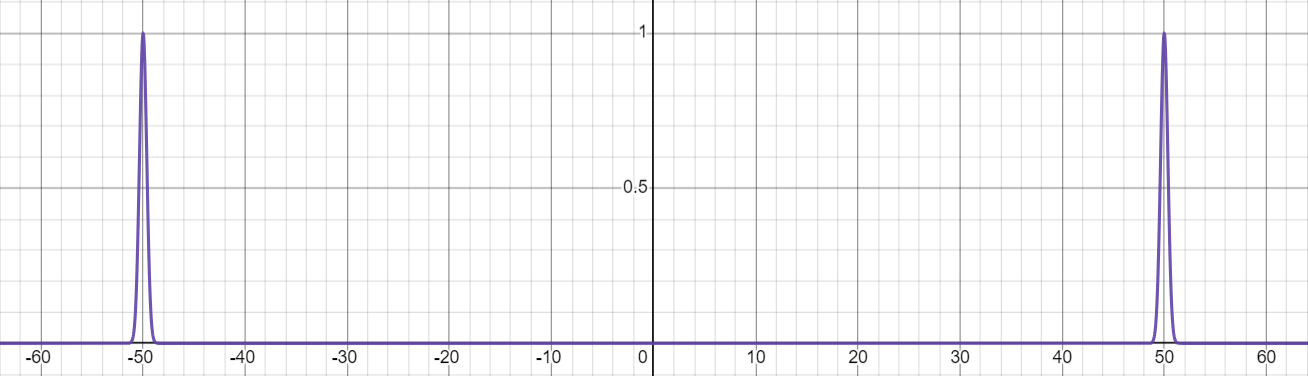
</div>

<br>

The peak to the left corresponds to the term $e^{-\sigma^2(\omega_0 + \omega)^2}$, the peak to the right corresponds to the term $e^{-\sigma^2(\omega_0 - \omega)^2}$. The term $2e^{-\sigma^2(\omega_0^2 + \omega^2)}\cos(2\tau\omega)$ does not show up at all. Thus the sketch suggests that this term can be neglected. Furthermore, since we are only considering frequencies around resonance (and not considering negative frequencies), the peak on the left can be ignored. This suggest that the term $e^{-\sigma^2(\omega_0 + \omega)^2}$ can also be neglected.

</details>

<br>

Use the restrictions and approximations on the pulse to show mathematically that two of the three terms in the first-order transition probability can be neglected, when considering a well-behaved pulse with a frequency around the resonance frequency of the qubit. What shape does the first-order transition probability now have, when viewed as a function of frequency?

<details>
<summary>Hint 1</summary>
We know that $\sigma\omega_0, \sigma\omega \gg 1$ from which it follows that $\sigma^2\omega_0^2, \sigma^2\omega^2 \gg 1$. Since $\omega \approx \omega_0$, it also follows that $\sigma^2\omega_0\omega \gg 1$. What does that tell you about each of the terms in the first-order transition probability?
</details>

<br>

<details>
<summary>Answer</summary>

We are considering the transition probability:
\begin{align*}
    P_{a \rightarrow b} = |c_b|^2 \approx \frac{A^2}{2\hbar^2}\pi\sigma^2\exp\left( \frac{3\tau^2}{4\sigma^2} \right) \left[ e^{-\sigma^2(\omega_0 + \omega)^2} + e^{-\sigma^2(\omega_0 - \omega)^2} + 2e^{-\sigma^2(\omega_0^2 + \omega^2)}\cos(2\tau\omega) \right]
\end{align*}

For the first term we have:

\begin{align*}
    e^{-\sigma^2(\omega_0 + \omega)^2} = e^{-\sigma^2\omega_0^2}e^{-\sigma^2\omega^2}e^{-2\sigma^2\omega_0\omega}
\end{align*}

We know that $\sigma\omega_0, \sigma\omega \gg 1$ from which it follows that $\sigma^2\omega_0^2, \sigma^2\omega^2 \gg 1$, hence $e^{-\sigma^2\omega_0^2}, e^{-\sigma^2\omega^2} \ll 1$. Since $\omega \approx \omega_0$, it also follows that $\sigma^2\omega_0\omega \gg 1$, hence $e^{-2\sigma^2\omega_0\omega} \ll 1$. It is then certainly the case that $e^{-\sigma^2(\omega_0 + \omega)^2} \ll 1$.

For the third term we have:

\begin{align*}
    e^{-\sigma^2(\omega_0^2 + \omega^2)} = e^{-\sigma^2\omega_0^2}e^{-\sigma^2\omega^2}
\end{align*}

But we have already concluded that $e^{-\sigma^2\omega_0^2}, e^{-\sigma^2\omega^2} \ll 1$, hence $e^{-\sigma^2(\omega_0^2 + \omega^2)} \ll 1$. 

The second term however is not negligible. In particular we see that as $\omega$ approaches $\omega_0$, $e^{-\sigma^2(\omega_0 - \omega)^2}$ approaches 1. We can therefore conclude that in the region around resonance for a well-behaved Gaussian pulse, the first-order transition probability can be written as:

\begin{align*}
    P_{a \rightarrow b} \approx \frac{A^2}{2\hbar^2}\pi\sigma^2\exp\left( \frac{3\tau^2}{4\sigma^2} \right) e^{-\sigma^2(\omega_0 - \omega)^2} 
\end{align*}

When viewed as a function of frequency, the transition probability has a Gaussian shape.
</details>

<br>

## Experimenting with Gaussian pulses

</div>

<div class="alert alert-block alert-success"> <strong>Learning goals:</strong> 
    
- Being able to test theoretical predictions with the Pulse module in Qiskit.
- Being able to use the Pulse module in Qiskit to explore phenomena that might not be apparent theoretically.
</div>

<div class="alert alert-block alert-warning"> <strong>Experiment:</strong> Testing theories with the Pulse module. </div>

Use the Pulse module in Qiskit to verify that the qubit transition probability as a function of frequency for Gaussian pulses has a Gaussian shape. Remember the pulse restrictions from the previous segment and keep the ratio between $\sigma$ and $\tau$ constant for the Gaussian pulses you send to the qubit.

In [7]:
#Your code here




<div class="alert alert-block alert-warning"> <strong>Experiment:</strong> Exploring new qubit phenomena. </div>

Would you expect to see Rabi oscillations for a qubit being hit by Gaussian pulses? Why/Why not? Find out whether of not this is the case by using the Pulse module to conduct an experiment.

In [8]:
#Your code here


